In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df=pd.read_csv('weight-height.csv')

In [3]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [4]:
df.shape

(8555, 3)

In [5]:
df.isnull().sum()

Gender    0
Height    0
Weight    0
dtype: int64

In [6]:
len(df['Height'])

8555

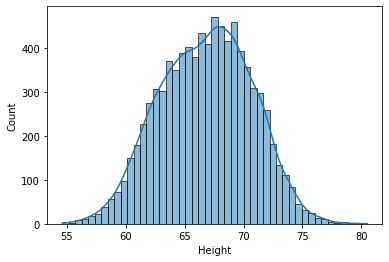

In [7]:
sns.histplot(df.Height, kde=True)

# Outlier Remove

In [8]:
#df.Height.mean()

In [9]:
mean = df['Height'].sum() / len(df['Height'])

In [10]:
mean

66.80992512908942

In [11]:
SD=df.Height.std()

In [12]:
SD

3.851454431577277

In [13]:
SD_plus=mean+(3* SD )

In [14]:
SD_plus

78.36428842382125

In [15]:
df[df.Height > SD_plus]

,Gender,Height,Weight
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989698
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6328,Female,80.450000,178.020675


In [16]:
SD_minus=mean - (3* SD)

In [17]:
SD_minus

55.25556183435759

In [18]:
df[df.Height < SD_minus]

,Gender,Height,Weight
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
7617,Female,55.148557,88.812412


In [19]:
out = df[(df.Height < SD_plus) & (df.Height > SD_minus) ]

In [20]:
df = out

In [21]:
df.shape

(8547, 3)

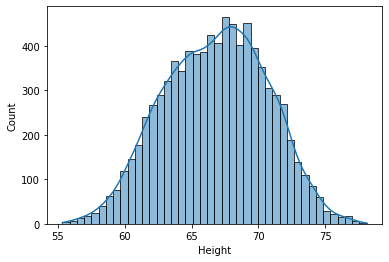

In [22]:
sns.histplot(df['Height'], kde=True)

# Encode the data set

In [23]:
from sklearn.preprocessing import LabelEncoder

In [24]:
for column in df.columns:
    if df[column].dtype == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

In [25]:
df.head()

,Gender,Height,Weight
0,1,73.847017,241.893563
1,1,68.781904,162.310473
2,1,74.110105,212.740856
3,1,71.730978,220.042470
4,1,69.881796,206.349801


In [26]:
df.shape

(8547, 3)

In [30]:
x=df.drop('Weight',axis=1)
y=df['Weight']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
xtrain,xtest, ytrain,ytest = train_test_split(x, y, train_size=.75,random_state=42)

In [36]:
from sklearn.tree import DecisionTreeRegressor

In [37]:
Clf = DecisionTreeRegressor()

In [38]:
Clf.fit(xtrain,ytrain) 

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [40]:
Clf.score(xtest,ytest)

0.7872725000460838